<font size="5"><b>A) KNN(Sklearn) on Combined data with feature scaling(Sklearn) :</b></font>

In [1]:
# after removing data row as index row and changing column names
import pandas as pd
import numpy as np
df=pd.read_csv('C:\\Users\\soham\\Downloads\\adult.data',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income'],header=None)
df 

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [2]:
#replacing "?" by np.nan
df=df.replace(' ?',np.nan)
#replace missing values by mean,mode
for i in df.columns:
    if (type(df[i].dropna().tolist()[0])==str): #we are checking type of first value of each column after dropping NA's from it.
        df[i]=df[i].fillna(df[i].mode()[0])   #So, no problem even if first value of column turns out to be missing
    elif (type(df[i].dropna().tolist()[0])==float):  #we are checking type of first available element of that column using dropna 
        df[i]=df[i].fillna(df[i].mean())
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#creating a dataframe with only integer/numerical type columns
dfint=pd.DataFrame()
for i in df.columns:
    if (type(df[i].tolist()[0])==int):
        dfint[i]=df[i].tolist()
dfint

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
5,37,284582,14,0,0,40
6,49,160187,5,0,0,16
7,52,209642,9,0,0,45
8,31,45781,14,14084,0,50
9,42,159449,13,5178,0,40


In [4]:
#creating a dataframe with only string type columns
dfobj=pd.DataFrame()
for i in df.columns:
    if (type(df[i].tolist()[0])==str):
        dfobj[i]=df[i].tolist()
dfobj

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = dfobj.iloc[:,0:8]
enc.fit(X)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=True)

In [6]:
#transform the complete dataframe to OHE array
enc.transform(X).toarray() 

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [7]:
#converting enc.transform array into a proper dataframe
onehotlabels = enc.transform(X).toarray()

new_columns=[]
for col, values in zip(X.columns, enc.categories_):
    new_columns.extend([col + '_' + str(i) for i in values])

    
dfobj_ohe = pd.DataFrame(onehotlabels, columns=new_columns)
dfobj_ohe

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
pd.concat([dfint.iloc[:,:],dfobj_ohe.iloc[:,:]],axis='columns')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37,284582,14,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,49,160187,5,0,0,16,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,52,209642,9,0,0,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,31,45781,14,14084,0,50,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,42,159449,13,5178,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
#performing train-test-split on our dataframe
# X consists of only integer type columns, y consists of output column("income")
import numpy as np
from sklearn.model_selection import train_test_split
X, y = pd.concat([dfint.iloc[:,:],dfobj_ohe.iloc[:,:]],axis='columns'),df.iloc[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [10]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
11928,45,249935,13,0,0,60,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25343,32,188154,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3107,61,124971,16,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19279,32,190784,10,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24666,35,175769,9,0,0,65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22392,40,261497,9,0,0,35,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24426,39,147500,9,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29290,22,171419,11,0,0,40,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4174,17,114798,7,0,0,18,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9126,68,193666,16,20051,0,55,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler
data = X_train
scaler = StandardScaler()


In [12]:
X_train.loc[:,:] = scaler.fit_transform(data)
X_train

C:\Users\soham\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
11928,0.472415,0.562154,1.132650,-0.146796,-0.218312,1.593580,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
25343,-0.481754,-0.021028,-0.037195,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
3107,1.646776,-0.617444,2.302494,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,-1.745118,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
19279,-0.481754,0.003798,-0.037195,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
24666,-0.261561,-0.137936,-0.427143,-0.146796,-0.218312,1.999400,-0.177216,-0.260271,-0.016227,-1.745118,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
22392,0.105427,0.671294,-0.427143,-0.146796,-0.218312,-0.435519,-0.177216,3.842148,-0.016227,-1.745118,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
24426,0.032029,-0.404782,-0.427143,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
29290,-1.215729,-0.178998,0.352753,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,19.971471,-0.04193,-0.023889,-0.023889,-3.264707,-0.04594,-0.022952
4174,-1.582717,-0.713473,-1.207039,-0.146796,-0.218312,-1.815307,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
9126,2.160559,0.031003,2.302494,2.611506,-0.218312,1.187760,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.04193,-0.023889,-0.023889,0.306306,-0.04594,-0.022952


In [13]:
scaler.transform(X_test)

array([[-0.48175361,  0.66616842, -1.20703941, ...,  0.3063062 ,
        -0.0459396 , -0.02295164],
       [-0.55515117,  0.43430574, -0.03719495, ...,  0.3063062 ,
        -0.0459396 , -0.02295164],
       [ 1.49998052, -0.13869139, -0.03719495, ..., -3.26470703,
        -0.0459396 , -0.02295164],
       ...,
       [ 0.54581224,  1.53515082,  2.30249396, ...,  0.3063062 ,
        -0.0459396 , -0.02295164],
       [-0.26156093,  0.11863909, -0.4271431 , ..., -3.26470703,
        -0.0459396 , -0.02295164],
       [ 1.05959516,  0.06711825, -0.4271431 , ...,  0.3063062 ,
        -0.0459396 , -0.02295164]])

In [14]:
X_test.loc[:,:] = scaler.transform(X_test)
X_test

C:\Users\soham\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
32264,-0.481754,0.666168,-1.207039,-0.146796,4.830654,-0.841339,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
28024,-0.555151,0.434306,-0.037195,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
9347,1.499981,-0.138691,-0.037195,-0.146796,-0.218312,-2.139963,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,-3.264707,-0.04594,-0.022952
10427,-0.114766,-0.713784,-0.037195,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
4810,0.105427,-0.100669,1.132650,-0.146796,3.648771,1.593580,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
11139,-0.261561,-0.220126,-0.427143,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
20926,-1.215729,-0.451356,-0.427143,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
24150,-0.261561,-0.717550,1.132650,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,-1.745118,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
15504,-1.142332,0.450362,1.132650,-0.146796,-0.218312,-0.029699,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952
9407,0.252222,-0.136369,-0.427143,-0.146796,4.677356,0.457285,-0.177216,-0.260271,-0.016227,0.573027,...,-0.034439,-0.058222,-0.014813,-0.050071,-0.041930,-0.023889,-0.023889,0.306306,-0.04594,-0.022952


<b>To avoid this warning, do as done below in k-fold example:</b>
<hr>
<b>X_train_kf = pd.DataFrame(scaler.fit_transform(X_train_kf),index=X_train_kf.index, columns=X_train_kf.columns)</b>

In [15]:
X = X_train.iloc[:,:]
y = y_train['income']
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
#takes time approx 15-20s
predict_probabilities = neigh.predict_proba(X_test.iloc[:,:])
predict_probabilities

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [17]:
#takes time approx 15-20s
predictions = neigh.predict(X_test.iloc[:,:])
predictions

array([' <=50K', ' <=50K', ' >50K', ..., ' >50K', ' >50K', ' <=50K'],
      dtype=object)

In [18]:
#takes time approx 15-20s
accuracy_score = neigh.score(X_test.iloc[:,:], y_test['income'])
accuracy_score

0.8166649605896202

<font size="5"><b>B) KNN(Sklearn) on Combined data with k-variation for best accuracy :</b></font>

In [20]:
# will take a lot of time 
def best_accuracy(X_training,y_training,X_testing,y_testing,opcol,k_range):
    acc={}
    for k in range(1,k_range):
        print("K = ",k," ongoing...")
        neighk = KNeighborsClassifier(n_neighbors=k)
        neighk.fit(X_training,y_training[opcol])
        acc[k]=neighk.score(X_testing,y_testing[opcol])
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict = best_accuracy( X_train.iloc[:,:], y_train, X_test.iloc[:,:], y_test,'income', 30)
accuracy_dict

K =  1  ongoing...
K =  2  ongoing...
K =  3  ongoing...
K =  4  ongoing...
K =  5  ongoing...
K =  6  ongoing...
K =  7  ongoing...
K =  8  ongoing...
K =  9  ongoing...
K =  10  ongoing...
K =  11  ongoing...
K =  12  ongoing...
K =  13  ongoing...
K =  14  ongoing...
K =  15  ongoing...
K =  16  ongoing...
K =  17  ongoing...
K =  18  ongoing...
K =  19  ongoing...
K =  20  ongoing...
K =  21  ongoing...
K =  22  ongoing...
K =  23  ongoing...
K =  24  ongoing...
K =  25  ongoing...
K =  26  ongoing...
K =  27  ongoing...
K =  28  ongoing...
K =  29  ongoing...
21


{1: 0.7975227761285699,
 2: 0.8115467294503019,
 3: 0.8166649605896202,
 4: 0.8199406285187839,
 5: 0.8213737332377931,
 6: 0.8226021087112294,
 7: 0.8253659535264612,
 8: 0.8263895997543249,
 9: 0.8271061521138294,
 10: 0.826696693622684,
 11: 0.8288463507011977,
 12: 0.8269014228682567,
 13: 0.8273108813594022,
 14: 0.8278227044733341,
 15: 0.8279250690961204,
 16: 0.8297676323062749,
 17: 0.8299723615518477,
 18: 0.8299723615518477,
 19: 0.8302794554202068,
 20: 0.8300747261746341,
 21: 0.8304841846657796,
 22: 0.8300747261746341,
 23: 0.8302794554202068,
 24: 0.8286416214556249,
 25: 0.8285392568328386,
 26: 0.8274132459821886,
 27: 0.8281297983416931,
 28: 0.8276179752277613,
 29: 0.8274132459821886}

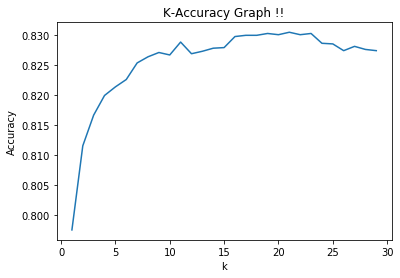

In [25]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict.keys())
# corresponding y axis values 
y = list(accuracy_dict.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph !!') 

# function to show the plot 
plt.show() 


<font size="5"><b>C) KNN(Sklearn) on Combined Data by Varying the value of 'K' with Cross Validation :</b></font>

In [23]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def best_accuracy_kf(inp_df,op_df,opcol,k_range,kf_splits):
    X_kf = inp_df
    y_kf = op_df
    kf = KFold(n_splits=kf_splits)
    kf.get_n_splits(X_kf)
    acc={}
    for k in range(1,k_range):
        print('For K = ',k," :")
        acckf=[]
        for train_index, test_index in kf.split(X_kf):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train_kf, X_test_kf = X_kf.iloc[train_index], X_kf.iloc[test_index]
            y_train_kf, y_test_kf = y_kf.iloc[train_index], y_kf.iloc[test_index]
            X_train_kf = pd.DataFrame(scaler.fit_transform(X_train_kf),index=X_train_kf.index, columns=X_train_kf.columns)
            X_test_kf = pd.DataFrame(scaler.transform(X_test_kf),index=X_test_kf.index, columns=X_test_kf.columns)
            neighk = KNeighborsClassifier(n_neighbors=k)
            neighk.fit(X_train_kf,y_train_kf[opcol])
            acckf.append(neighk.score(X_test_kf,y_test_kf[opcol]))
            
        accavg=np.sum(acckf)/len(acckf)
        acc[k]=accavg
    print(max(acc,key=acc.get))
    #return max(acc,key=acc.get)
    return acc

accuracy_dict_kf = best_accuracy_kf( pd.concat([dfint.iloc[:,:],dfobj_ohe.iloc[:,:]],axis='columns') , df.iloc[:,[-1]],'income', 5, 5)
accuracy_dict_kf

For K =  1  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  2  :
TRAIN: [ 6513  6514  6515 ... 32558 32559 32560] TEST: [   0    1    2 ... 6510 6511 6512]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [ 6513  6514  6515 ... 13022 13023 13024]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [13025 13026 13027 ... 19534 19535 19536]
TRAIN: [    0     1     2 ... 32558 32559 32560] TEST: [19537 19538 19539 ... 26046 26047 26048]
TRAIN: [    0     1     2 ... 26046 26047 26048] TEST: [26049 26050 26051 ... 32558 32559 32560]
For K =  3  :


{1: 0.7907313703720888,
 2: 0.8096805066864947,
 3: 0.8159456035953042,
 4: 0.8233163327474704}

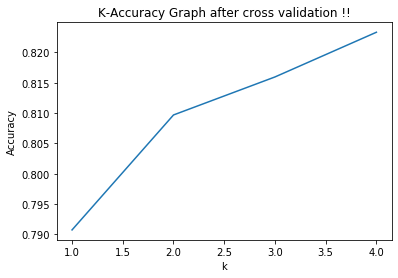

In [24]:
# importing the required module 
import matplotlib.pyplot as plt 

# x axis values 
x = list(accuracy_dict_kf.keys())
# corresponding y axis values 
y = list(accuracy_dict_kf.values())

# plotting the points 
plt.plot(x, y) 

# naming the x axis 
plt.xlabel('k') 
# naming the y axis 
plt.ylabel('Accuracy') 

# giving a title to my graph 
plt.title('K-Accuracy Graph after cross validation !!') 

# function to show the plot 
plt.show() 
